# ✏️ Esercizi {#sec-ex-optimal-scaling}

## Ottimizzazione dello scoring dei dati di questionari ordinali

Nell'Esercizio precedente, abbiamo calcolato i punteggi del **Strength and Difficulties Questionnaire (SDQ)** utilizzando il cosiddetto approccio della **"scalatura Likert"**. In questo metodo, alle categorie di risposta "Non vero", "Parzialmente vero" e "Assolutamente vero" sono stati assegnati interi consecutivi, rispettivamente 0-1-2. Sebbene questo assegnamento rifletta apparentemente un grado crescente di accordo nelle opzioni di risposta, la scelta degli interi è stata arbitraria: non vi era un motivo particolare per assegnare 0-1-2 anziché, ad esempio, 1-2-3. Questo tipo di assegnazione arbitraria dei punteggi agli item è comunemente chiamato **"misurazione per decreto"** (*measurement by fiat*). 

In questo secondo esercizio, cercheremo di individuare punteggi "ottimali" per le risposte ordinali al SDQ. Per "ottimali" intendiamo che i punteggi assegnati non siano semplicemente arbitrari, ma rappresentino la "migliore" scelta possibile in base a un determinato criterio statistico.

Esistono diversi modi per "ottimizzare" i punteggi degli item. In questo caso, ci concentreremo sulla massimizzazione del rapporto tra la varianza del punteggio totale e la somma delle varianze dei punteggi degli item. In psicometria, soddisfare questo criterio significa massimizzare la somma delle correlazioni tra gli item e, di conseguenza, migliorare la **consistenza interna** del test, misurata dall'**alfa di Cronbach**.

Questo approccio consente di definire punteggi più informativi, che riflettono meglio la coerenza tra le risposte degli item e il punteggio totale del test, migliorando la qualità psicometrica della scala.

Per fare un esempio, useremo di nuovo gli item della scala  **Sintomi Emotivi**. Utilizzeremo il pacchetto **`aspect`**, che semplifica l'ottimizzazione della scalatura grazie a una gamma di opzioni utili e a funzioni grafiche integrate. 

In [3]:
source("../../code/_common.R")
library("aspect")

Importiamo i dati del *Strengths and Difficulties Questionnaire* (SDQ).

In [4]:
load("../../data/data_sdq/SDQ.RData")

In [5]:
glimpse(SDQ)

Rows: 228
Columns: 51
$ Gender   <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ~
$ consid   <dbl> 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, ~
$ restles  <dbl> 2, 0, 0, 0, 1, 0, 2, 1, 2, 0, 1, 1, 0, 1, 0, 2, 0, 1, 1, ~
$ somatic  <dbl> 2, 2, 0, 0, 2, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1, ~
$ shares   <dbl> 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, ~
$ tantrum  <dbl> 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 1, 0, 1, 1, 2, 0, 1, 1, ~
$ loner    <dbl> 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, ~
$ obeys    <dbl> 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, ~
$ worries  <dbl> 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 2, 0, 1, 1, 2, ~
$ caring   <dbl> 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, ~
$ fidgety  <dbl> 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, ~
$ friend   <dbl> 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, ~
$ fights   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

Per analizzare solo gli item che misurano i Sintomi Emotivi, è conveniente creare un nuovo data frame.

In [6]:
items_emotion <- c("somatic", "worries", "unhappy", "clingy", "afraid")
sdq_emo <- SDQ[, items_emotion]
sdq_emo |>
    head()

somatic,worries,unhappy,clingy,afraid
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,1,0,1,0
2,0,0,1,0
0,0,0,0,1
0,0,0,1,1
2,1,0,1,0
1,0,0,1,0


Affrontiamo il problema dei dati mancanti come discusso in precedenza.

In [8]:
sdq_emo <- sdq_emo %>%
    mutate_at(vars(somatic:afraid), ~ ifelse(is.na(.), mean(., na.rm = TRUE), .)) |> round()

Esaminiamo le modalità di ciascun item:

In [9]:
emotional_symptoms <- c("somatic", "worries", "unhappy", "clingy", "afraid")
result <- lapply(emotional_symptoms, function(x) sort(unique(sdq_emo[[x]])))
result |> print()

[[1]]
[1] 0 1 2

[[2]]
[1] 0 1 2

[[3]]
[1] 0 1 2

[[4]]
[1] 0 1 2

[[5]]
[1] 0 1 2



Trasformiamo il data frame in una matrice.

In [10]:
M <- sdq_emo |> as.matrix()

Implementiamo lo scaling ottimale con la funzione `corAspect()`.

In [11]:
opt <- corAspect(M, aspect = "aspectSum", level = "ordinal")

Parametri principali della funzione:

1. **`data`**  
   Questo argomento rappresenta il data frame che contiene i dati da analizzare. Nel nostro caso, si tratta degli item relativi alla scala che stiamo studiando (ad esempio, quelli che misurano i **Sintomi Emotivi**).

2. **`aspect`**  
   Questo parametro specifica il criterio da ottimizzare. Per impostazione predefinita, `aspect="aspectSum"` massimizza la somma delle correlazioni tra gli item. Questo criterio è utile per migliorare la consistenza interna della scala, ad esempio incrementando l'alfa di Cronbach. Nel nostro caso, utilizziamo questa impostazione predefinita.

3. **`level`**  
   Questo argomento definisce il livello di misura delle variabili analizzate:  
   - **`nominal`** (impostazione predefinita): suppone che le variabili rappresentino categorie nominali. In questo caso, non vi sono restrizioni sui punteggi risultanti.  
   - **`ordinal`**: richiede che l’ordine dei punteggi venga preservato.  
   - **`numerical`**: oltre a preservare l’ordine, richiede che le distanze tra i punteggi siano uguali.  

Nel caso delle categorie di risposta del **SDQ** ("non vero", "parzialmente vero", "assolutamente vero"), queste riflettono chiaramente un ordine crescente di accordo. Vogliamo preservare questo ordine durante l'ottimizzazione, quindi impostiamo `level="ordinal"`.

Esaminiamo il risultato ottenuto.

In [13]:
attributes(opt) |> print()

$names
 [1] "loss"      "catscores" "cormat"    "eigencor"  "indmat"    "scoremat" 
 [7] "data"      "burtmat"   "niter"     "call"     

$class
[1] "aspect"



In [15]:
summary(opt)


Correlation matrix of the scaled data:
        somatic worries unhappy clingy afraid
somatic   1.000   0.339   0.369  0.254  0.313
worries   0.339   1.000   0.468  0.397  0.378
unhappy   0.369   0.468   1.000  0.367  0.454
clingy    0.254   0.397   0.367  1.000  0.378
afraid    0.313   0.378   0.454  0.378  1.000


Eigenvalues of the correlation matrix:
[1] 2.497 0.757 0.634 0.610 0.502

Category scores:
somatic:
    score
0 -0.901
1  0.586
2  1.972

worries:
    score
0 -0.854
1  0.445
2  2.096

unhappy:
    score
0 -0.601
1  1.393
2  2.659

clingy:
    score
0 -1.199
1  0.237
2  1.617

afraid:
    score
0 -0.769
1  1.009
2  1.951



1. **Punteggi ottimali per ogni item:**  
   La funzione calcola i punteggi "ottimali" per ogni item, ovvero valori che massimizzano la somma delle correlazioni tra gli item. Questo migliora la coerenza interna della scala.  

2. **Preservazione dell'ordine delle risposte:**  
   Utilizzando `level="ordinal"`, i punteggi ottimizzati mantengono l'ordine crescente delle categorie di risposta, come ad esempio:
   - "non vero" < "parzialmente vero" < "assolutamente vero".  
   Ciò assicura che la struttura ordinata delle risposte venga rispettata.

3. **Correlazioni e punteggi trasformati:**  
   L'output include:  
   - La **matrice di correlazione** dei punteggi trasformati, ovvero le correlazioni tra gli item dopo la scalatura ottimale.  
   - Le correlazioni possono essere confrontate con quelle calcolate sulle variabili originali utilizzando la funzione `cor(items)`.  

4. **Autovalori della matrice di correlazione:**  
   L'output mostra anche gli **autovalori** della matrice di correlazione, che rappresentano le varianze delle componenti principali (da un'Analisi delle Componenti Principali, PCA).  
   - Gli autovalori sono utili per determinare il numero di dimensioni misurate dal set di item.  
   - Ad esempio, se il primo autovalore è significativamente più grande degli altri, ciò suggerisce che gli item misurano una sola dimensione, come ci si aspettava.

5. **Punteggi delle categorie:**  
   La funzione mostra i **punteggi assegnati a ciascuna categoria di risposta** dopo la scalatura ottimale. Ad esempio, per l’item *somatic*, i risultati potrebbero indicare:  
   - "non vero" → -0.886  
   - "parzialmente vero" → 0.584  
   - "assolutamente vero" → 2.045  

   Questi punteggi sono scelti in modo da:
   - Avere una media pari a 0 nel campione analizzato.  
   - Massimizzare le correlazioni tra gli item, migliorando la coerenza interna della scala.

6. **Grafici delle trasformazioni:**  
   Il pacchetto **`aspect`** offre grafici utili che mostrano visivamente l’assegnazione dei punteggi alle categorie. Questi grafici aiutano a interpretare il risultato della scalatura ottimale in modo intuitivo.

Questo approccio offre un metodo rigoroso per ottimizzare la misurazione degli item, migliorando la qualità psicometrica della scala e assicurando che l'interpretazione delle risposte rifletta al meglio la coerenza interna del test.

I punteggi ottenuti si ottengono nel modo seguente:

In [14]:
opt$scoremat

,somatic,worries,unhappy,clingy,afraid
1,1.972,0.445,-0.601,0.237,-0.769
2,1.972,-0.854,-0.601,0.237,-0.769
3,-0.901,-0.854,-0.601,-1.199,1.009
4,-0.901,-0.854,-0.601,0.237,1.009
5,1.972,0.445,-0.601,0.237,-0.769
6,0.586,-0.854,-0.601,0.237,-0.769
7,-0.901,0.445,1.393,1.617,-0.769
8,-0.901,-0.854,-0.601,-1.199,-0.769
9,0.586,-0.854,-0.601,-1.199,-0.769
10,-0.901,-0.854,-0.601,-1.199,1.009


Esaminiamo la relazione tra lo scoring basato sul metodo Likert con lo scoring ottimale.

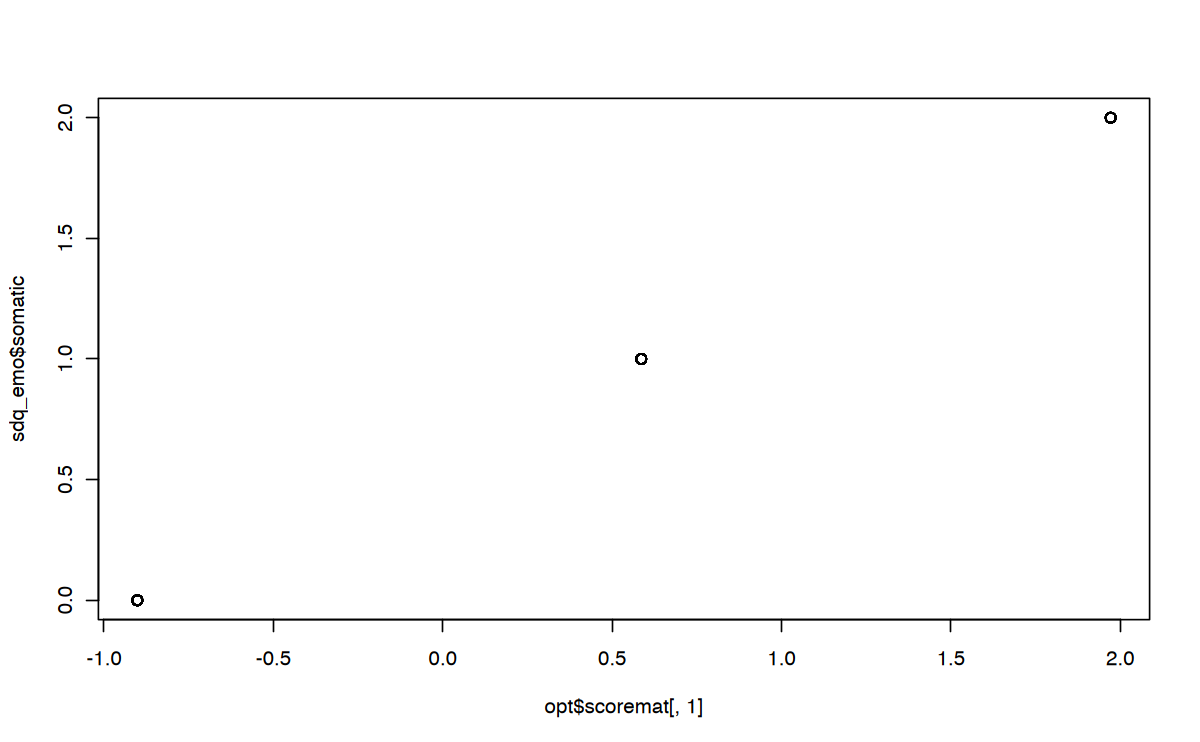

In [16]:
plot(opt$scoremat[, 1], sdq_emo$somatic)

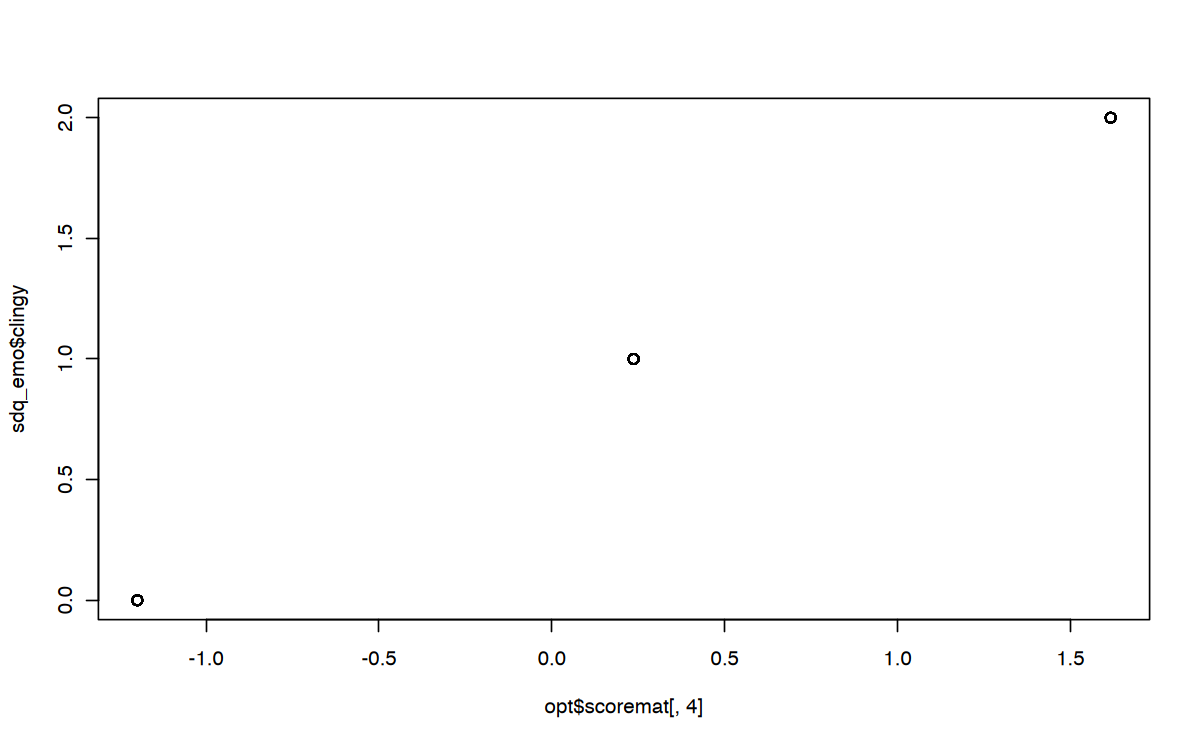

In [17]:
plot(opt$scoremat[, 4], sdq_emo$clingy)

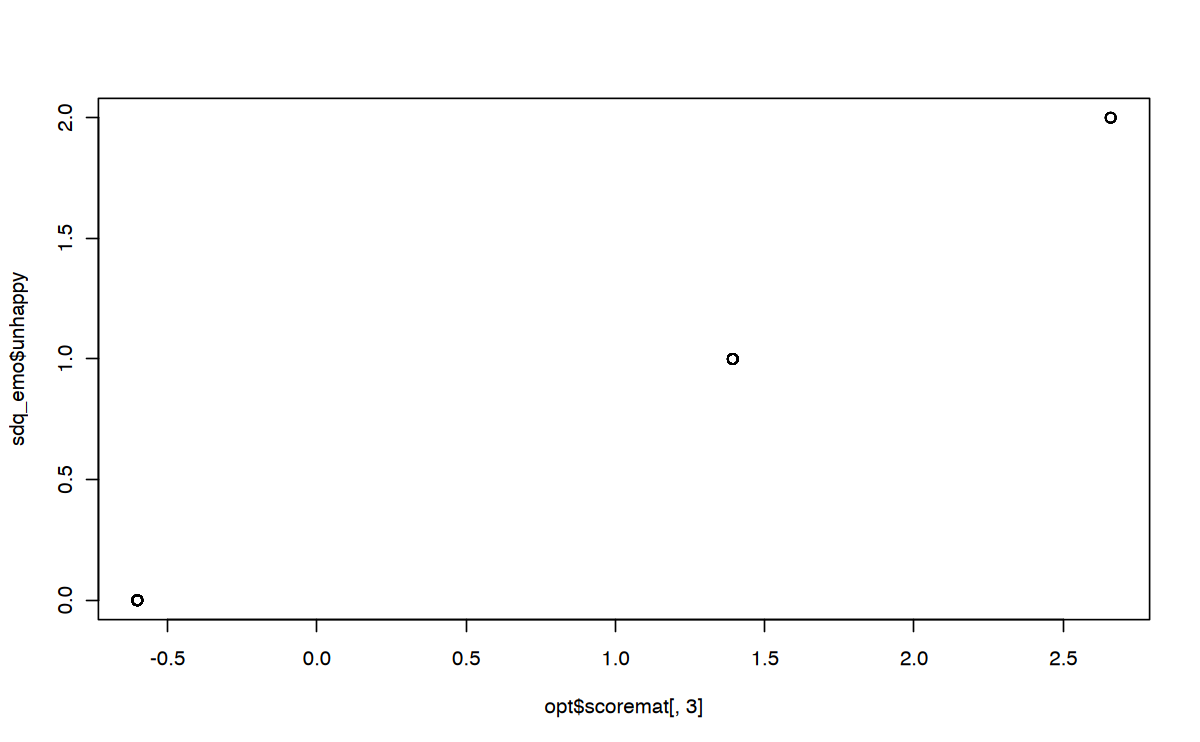

In [18]:
plot(opt$scoremat[, 3], sdq_emo$unhappy)

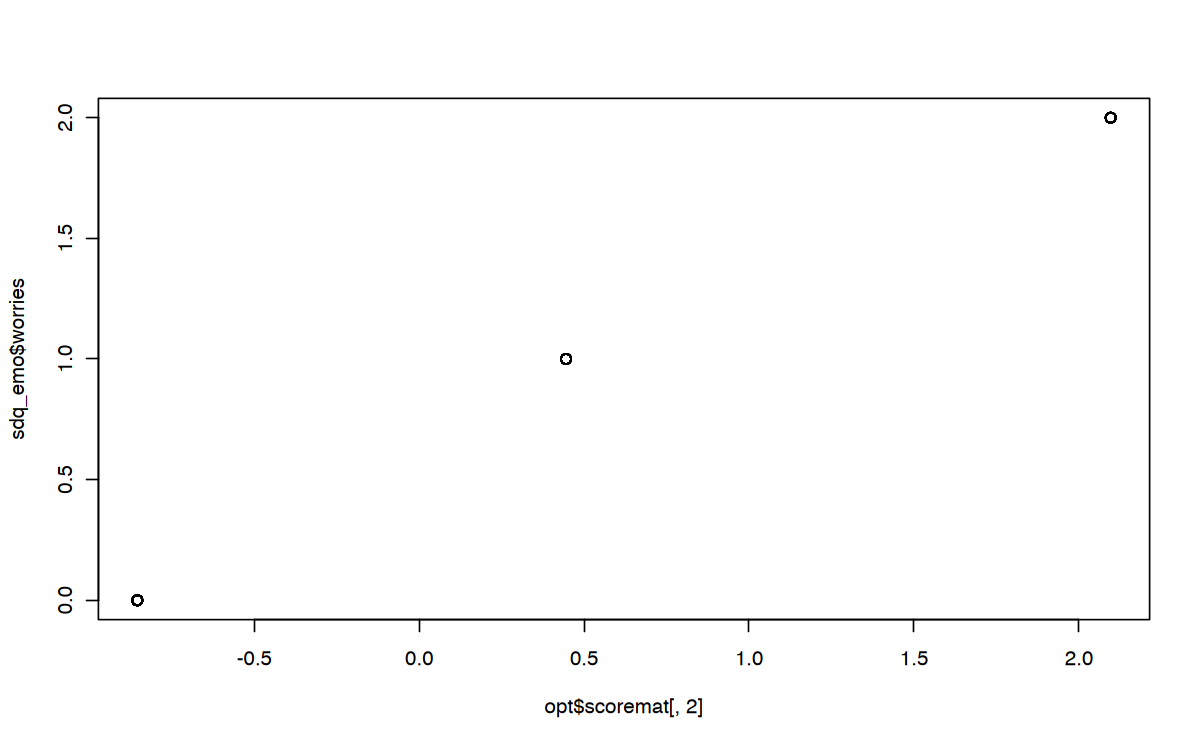

In [19]:
plot(opt$scoremat[, 2], sdq_emo$worries)

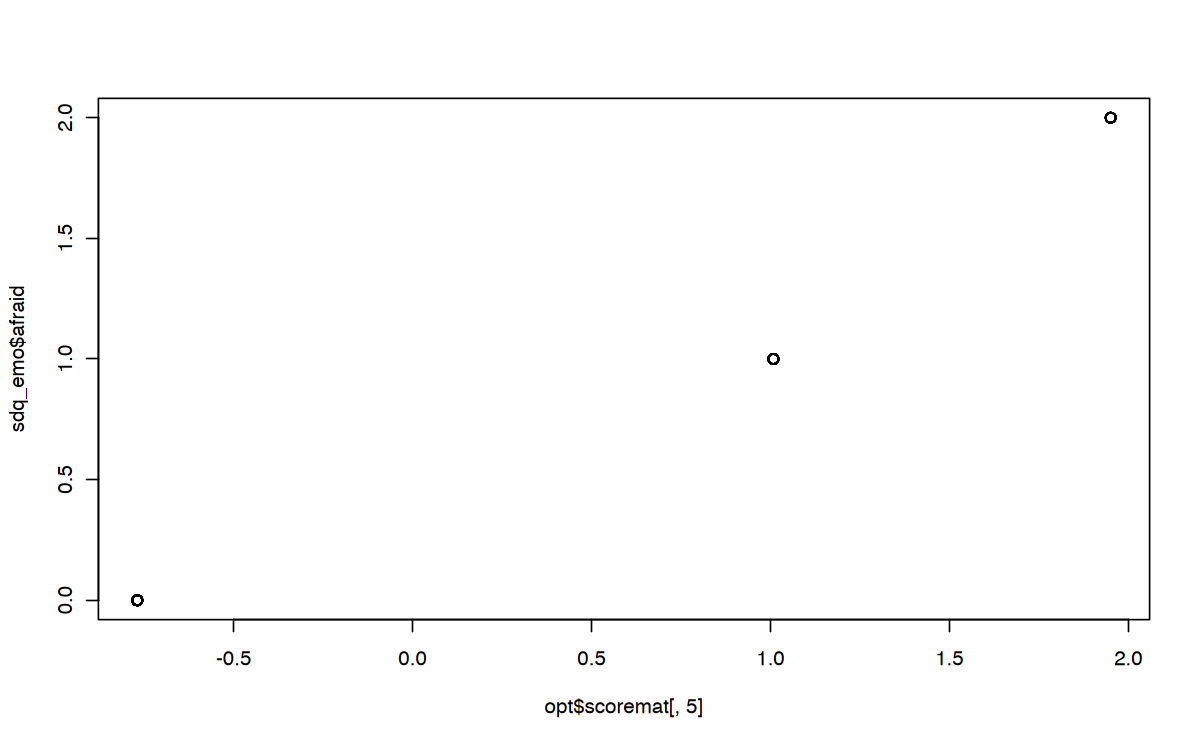

In [20]:
plot(opt$scoremat[, 5], sdq_emo$afraid)

Guardando ai grafici ottenuti, si può notare che 1) i punteggi per le categorie successive aumentano quasi linearmente; 2) le categorie sono approssimativamente equidistanti. Concludiamo che per la valutazione degli item ordinali nella scala dei Sintomi Emotivi del SDQ, la scala Likert è appropriata, e l'ottimizzazione della scala rispetto alla semplice scala Likert di base produce cambiamenti minimi. Per altri dati, comunque, la situazione potrebbe essere molto diversa.

In conclusione, l'ottimizzazione dello scoring dei dati di questionari ordinali offre un metodo rigoroso per ottimizzare la misurazione degli item, migliorando la qualità psicometrica della scala e assicurando che l'interpretazione delle risposte rifletta al meglio la coerenza interna del test.

## Session Info

In [21]:
sessionInfo()

R version 4.4.2 (2024-10-31)
Platform: aarch64-apple-darwin20
Running under: macOS Sequoia 15.1.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.12.0

locale:
[1] C

time zone: Europe/Rome
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] aspect_1.0-6      MASS_7.3-61       viridis_0.6.5     viridisLite_0.4.2
 [5] ggpubr_0.6.0      ggExtra_0.10.1    gridExtra_2.3     patchwork_1.3.0  
 [9] bayesplot_1.11.1  semTools_0.5-6    semPlot_1.1.6     lavaan_0.6-19    
[13] psych_2.4.6.26    scales_1.3.0      markdown_1.13     knitr_1.49       
[17] lubridate_1.9.3   forcats_1.0.0     stringr_1.5.1     dplyr_1.1.4      
[21] purrr_1.0.2       readr_2.1.5       tidyr_1.3.1       tibble_3.2.1     
[25] ggplot2_3.5.1   